In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
x = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [3]:
x_std = (x - x.mean())/x.std()

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(x_std)

PCA(n_components=2)

In [61]:
x_pca = pca.transform(x_std)

In [65]:
principal_components_df = pd.DataFrame(x_pca, columns=['PC1', 'PC2'])
final_df = pd.concat([principal_components_df, pd.DataFrame(y, columns=['target'])], axis=1)

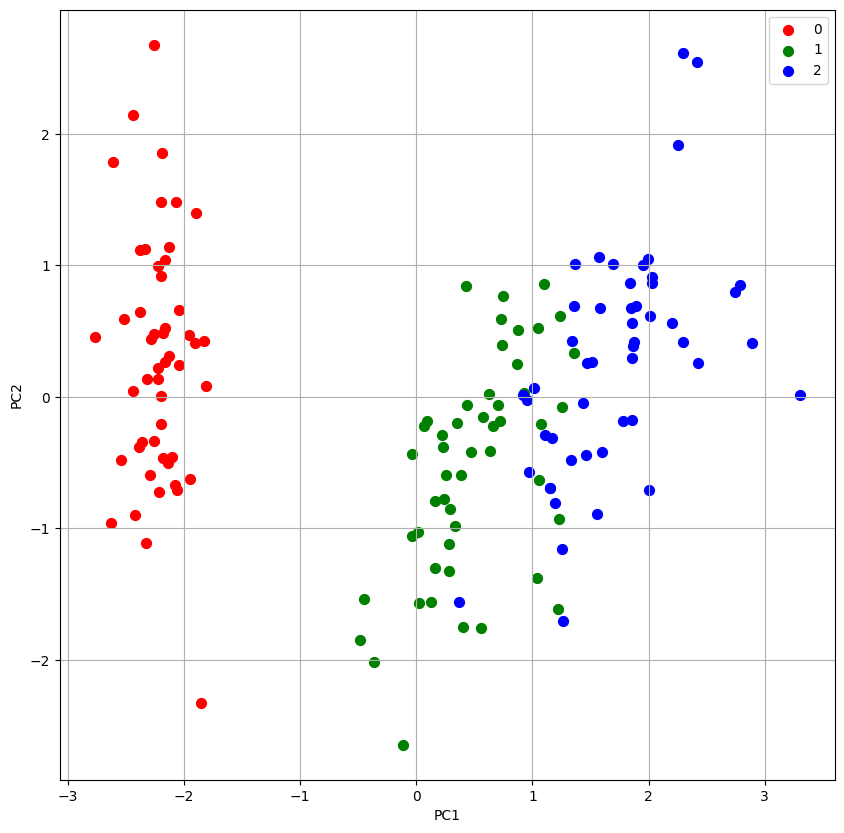

In [69]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
targets = [0, 1, 2]
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    keep = final_df['target'] == target
    ax.scatter(final_df.loc[keep, 'PC1'], final_df.loc[keep, 'PC2'], c=color, s=50)
    ax.legend(targets)
    ax.grid()
plt.show()